<a href="https://colab.research.google.com/github/pradeepvaranasi/insurance_re/blob/main/TigerAnalytics_CaseStudy_PradeepVaranasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Objective


**Goal:** Increase Profitability by targeting Customer Retention.

Cross-sell insurance (ppi) to the existing customer base who have a secured or unsecured type of loan, but no PPI product yet.

**Assumptions:**


1.   Insurance company based out of UK.
2.   List item



### Exploratory Data Analysis

####Importing Libraries

In [5]:
# Imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####Importing Data

In [6]:
# Establishing the connection between Colab and Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importing the data from gdrive
data = pd.read_excel('drive/MyDrive/Mortgage_Insurance_Data.xls')

In [8]:
# Displaying all the columns
pd.set_option('display.max_columns', None)

In [9]:
# Checking the output for first n rows
data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [10]:
# Creating a copy of the original dataframe
df = data.copy()

####Attributes Exploration

In [11]:
# Checking the shape of df
df.shape

(16383, 59)

In [12]:
# Checking the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

In [13]:
# Checking for missing values
df.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [14]:
# Checking the statistical summary for df - numerical columns
df.describe(include=('int', 'float'))

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,1.638300e+04,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,9405.000000,16383.000000,16383.000000,16383.000000
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,4.408716,194.491119,1.663663e+05,7.006096e+04,7.821424e+04,601.941952,2.692608,44.100531,64.961607,0.205579,5.011231,90.182262,18.579747,0.798633,0.482757,0.326497,2.917659,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,12142.797527,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,1.668857,107.144729,1.187209e+05,8.302773e+04,8.942350e+04,614.070641,2.381330,10.886422,82.041497,0.629787,42.609551,23.645068,63.096233,1.296641,1.138039,1.254672,2.398112,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,24.283753,0.485976,0.263032,0.325402
min,1.000000,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,10699.000000,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,3.000000,120.000000,1.200000e+05,0.000000e+00,9.255500e+03,112.500000,0.000000,36.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,716.000000,0.000000,0.000000,0.000000
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,5.000000,181.000000,1.250000e+05,6.000000e+04,5.943000e+04,496.000000,4.000000,44.000000,48.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000
75%,31689.000000,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,6.000000,252.000000,1.900000e+05,1.076985e+05,1.186560e+05,893.000000,5.000000,51.000000,104.000000,0.000000,0.000000,99.000000,8.000000,1.000000,0.000000,0.000000,4.000000,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,759.000000,1.000000,0.000000,0.000000
max,42072.000000,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,6.000000,756.000000,3.300000e+06,3.505442e+06,1.876225e+06,8942.000000,6.000000,77.000000,999.000000,9.000000,999.000000,99.000000,999.000000,6.000000,6.000000,9.000000,9.000000,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


In [15]:
# Checking the statistical summary on df (especially mean vs. median to check the effect of outliers)
df.describe(include=('int', 'float')).iloc[[1,5]]

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.80846,103.096075,4.408716,194.491119,166366.301288,70060.964842,78214.242446,601.941952,2.692608,44.100531,64.961607,0.205579,5.011231,90.182262,18.579747,0.798633,0.482757,0.326497,2.917659,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.00000,72.000000,5.000000,181.000000,125000.000000,60000.000000,59430.000000,496.000000,4.000000,44.000000,48.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000


In [16]:
# statistical summary - object datatytppe
df.describe(include ='object')

,Final_Grade,Loan_Type,Residential_Status,Telephone_Indicator,Marital_Status,Gender,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Payment_Method,Bankruptcy_Detected__SP_,CIFAS_detected,Insurance_Description,prdt_desc,category
count,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,9461,9345,9461
unique,10,2,4,2,4,2,9,2,2,2,2,2,2,2,2,2,3,3,3,24,15,4
top,A,UnSecured,H,Y,M,M,P,F,P,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,D,N,N,LASU,LASU,Single
freq,4538,13054,12572,15241,9432,9770,10118,16308,16361,16351,13028,12087,16227,16198,14659,12976,16308,16351,16292,2351,3889,6264


#####Insights

1. Total rows and columns
2. Datatypes: int- ; float- ; Object-  
3. Missing Values:
4. Possible Outliers:

####Data Visualization

In [17]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

#####uni-variate

In [18]:
df['PPI'].value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

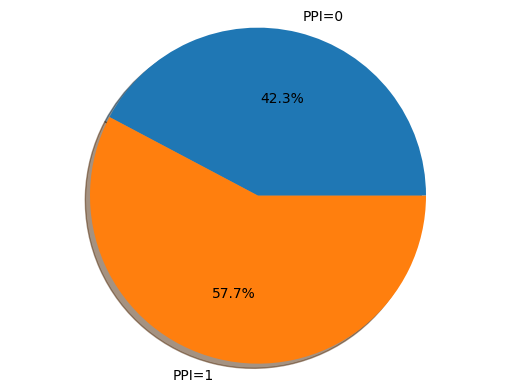

In [19]:
# PieChart for the column - PPI
labels = ['PPI=0', 'PPI=1']
sizes = [df['PPI'].value_counts()[0],
         df['PPI'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


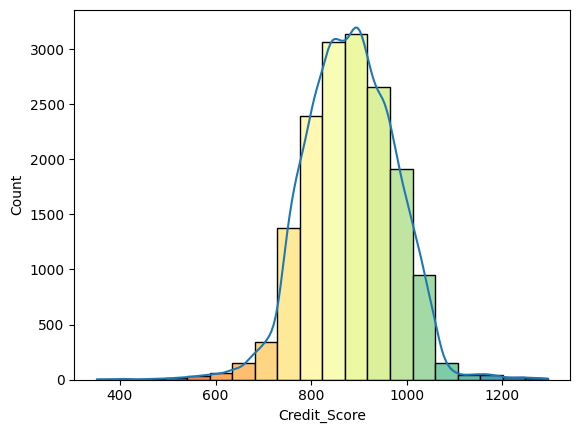

In [20]:
# Histplot for the column - 'Credit_Score'

cm = sns.color_palette("Spectral",20)
plot = sns.histplot(df['Credit_Score'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

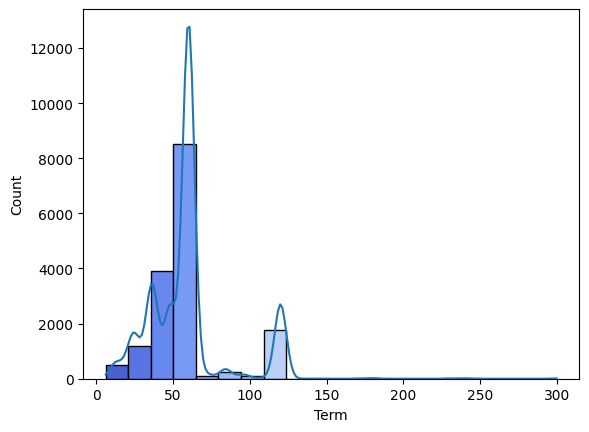

In [21]:
# Histplot for the column - 'Term'

cm = sns.color_palette("coolwarm",20)
plot = sns.histplot(df['Term'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

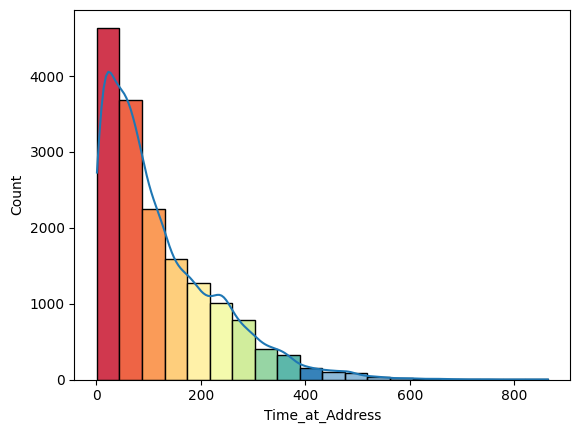

In [22]:
# Histplot for the column - 'Time_at_Address'

cm = sns.color_palette("Spectral",10)
plot = sns.histplot(df['Time_at_Address'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

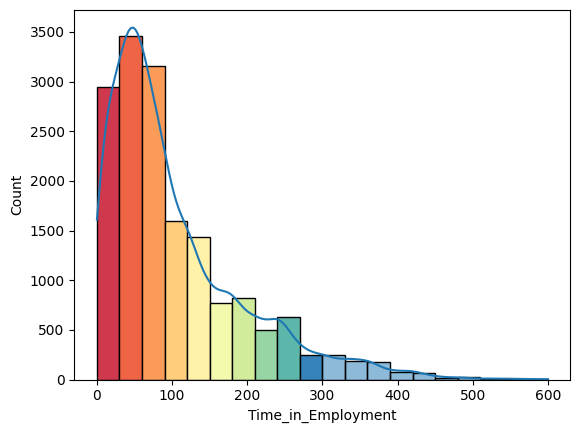

In [23]:
# Histplot for the column - 'Time_in_Employment'

cm = sns.color_palette("Spectral",10)
plot = sns.histplot(df['Time_in_Employment'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

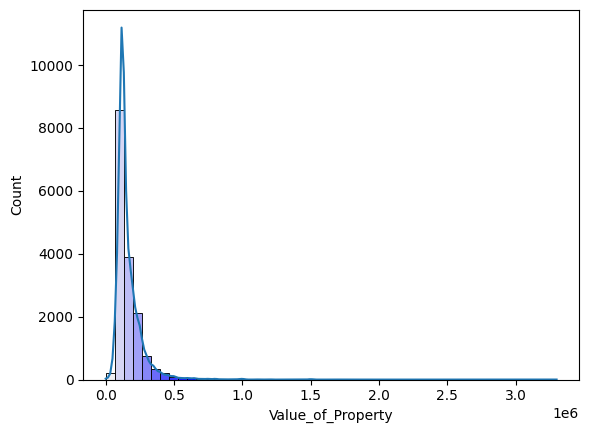

In [24]:
# Histplot for the column - 'Value_of_Property'

cm = sns.color_palette("light:b",10)
plot = sns.histplot(df['Value_of_Property'], bins=50, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

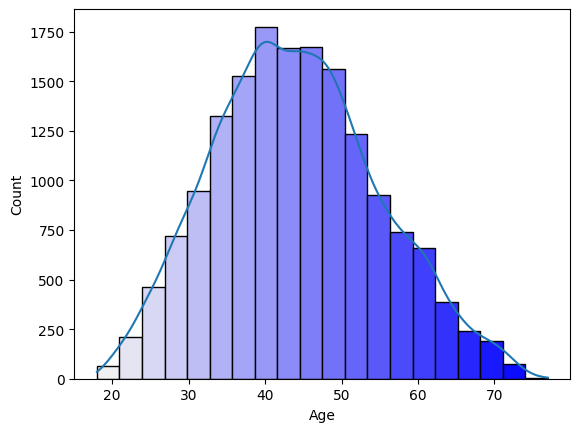

In [25]:
# Histplot for the column - 'Age'

cm = sns.color_palette("light:b",20)
plot = sns.histplot(abs(df['Age']), bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

[Text(0, 0, '4538 (28%)'),
 Text(0, 0, '4076 (25%)'),
 Text(0, 0, '2241 (14%)'),
 Text(0, 0, '1538 (9%)'),
 Text(0, 0, '1367 (8%)'),
 Text(0, 0, '1093 (7%)'),
 Text(0, 0, '733 (4%)'),
 Text(0, 0, '341 (2%)'),
 Text(0, 0, '328 (2%)'),
 Text(0, 0, '128 (1%)')]

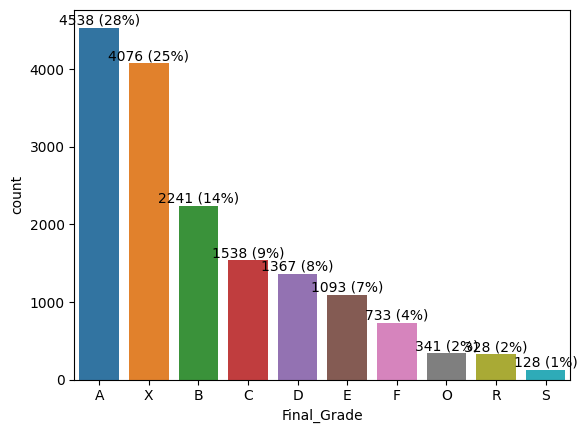

In [26]:
# Countplot for the column - Final_Grade
ax = sns.countplot(x=df['Final_Grade'],
order=df['Final_Grade'].value_counts(ascending=False).index);

abs_values = df['Final_Grade'].value_counts(ascending=False)
rel_values = df['Final_Grade'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

In [27]:
df['Loan_Type'].value_counts()

UnSecured    13054
secured       3329
Name: Loan_Type, dtype: int64

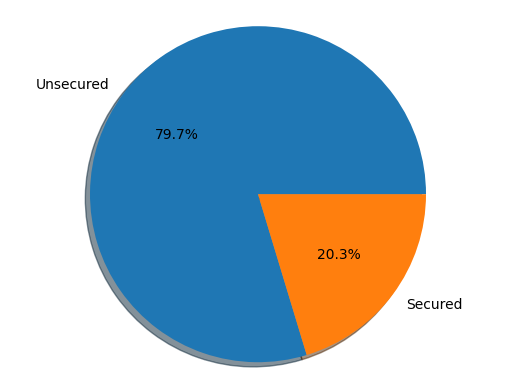

In [28]:
# PieChart for the column - Loan_Type
labels = ['Unsecured', 'Secured']
sizes = [df['Loan_Type'].value_counts()[0],
         df['Loan_Type'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


[Text(0, 0, '12572 (77%)'),
 Text(0, 0, '2885 (18%)'),
 Text(0, 0, '750 (5%)'),
 Text(0, 0, '176 (1%)')]

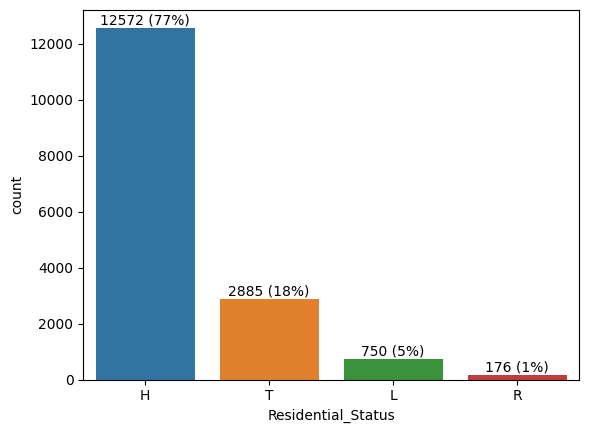

In [29]:
# Countplot for the column - Final_Grade
ax = sns.countplot(x=df['Residential_Status'],
order=df['Residential_Status'].value_counts(ascending=False).index);

abs_values = df['Residential_Status'].value_counts(ascending=False)
rel_values = df['Residential_Status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

[Text(0, 0, '9082 (55%)'),
 Text(0, 0, '3363 (21%)'),
 Text(0, 0, '2476 (15%)'),
 Text(0, 0, '1059 (6%)'),
 Text(0, 0, '311 (2%)'),
 Text(0, 0, '70 (0%)'),
 Text(0, 0, '18 (0%)'),
 Text(0, 0, '3 (0%)'),
 Text(0, 0, '1 (0%)')]

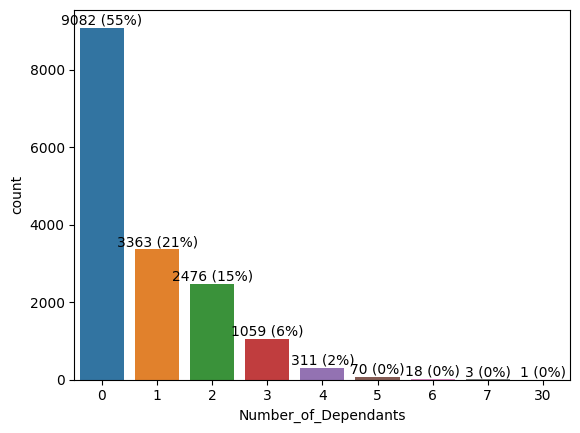

In [30]:
# Countplot for the column - Number_of_Dependants
ax = sns.countplot(x=df['Number_of_Dependants'],
order=df['Number_of_Dependants'].value_counts(ascending=False).index);

abs_values = df['Number_of_Dependants'].value_counts(ascending=False)
rel_values = df['Number_of_Dependants'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

[Text(0, 0, '9432 (58%)'),
 Text(0, 0, '5037 (31%)'),
 Text(0, 0, '1598 (10%)'),
 Text(0, 0, '316 (2%)')]

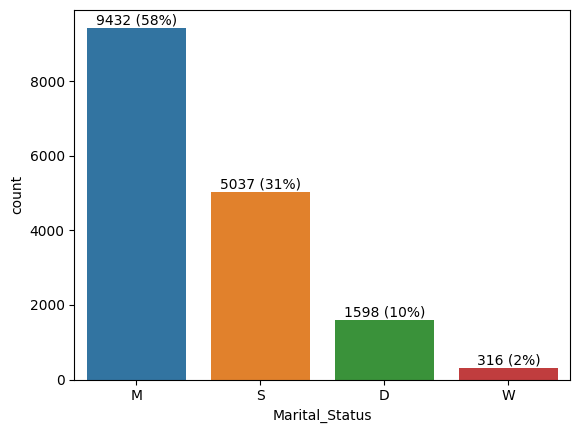

In [31]:
# Countplot for the column - Marital_Status
ax = sns.countplot(x=df['Marital_Status'],
order=df['Marital_Status'].value_counts(ascending=False).index);

abs_values = df['Marital_Status'].value_counts(ascending=False)
rel_values = df['Marital_Status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

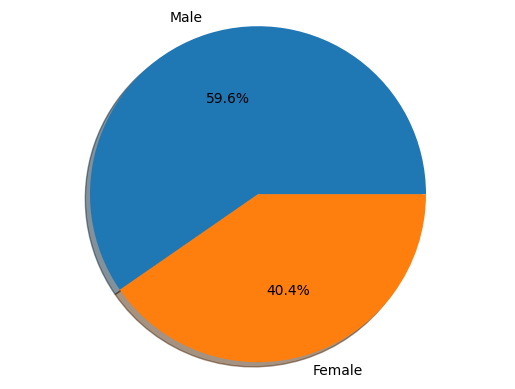

In [32]:
# PieChart for the column - Gender
labels = ['Male', 'Female']
sizes = [df['Gender'].value_counts()[0],
         df['Gender'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


[Text(0, 0, '16308 (100%)'), Text(0, 0, '58 (0%)'), Text(0, 0, '17 (0%)')]

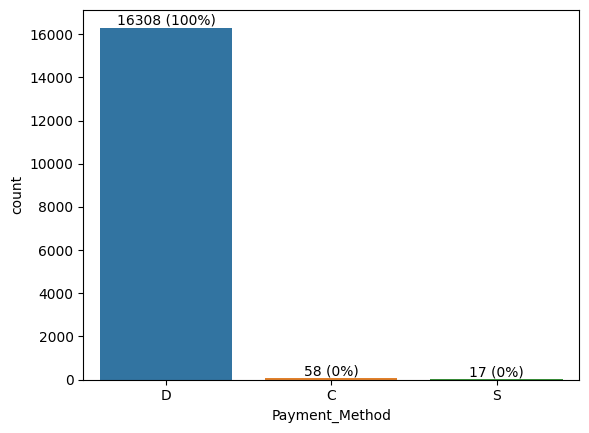

In [33]:
# Countplot for the column - Payment_Method
ax = sns.countplot(x=df['Payment_Method'],
order=df['Payment_Method'].value_counts(ascending=False).index);

abs_values = df['Payment_Method'].value_counts(ascending=False)
rel_values = df['Payment_Method'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

[Text(0, 0, '16351 (100%)'), Text(0, 0, '24 (0%)'), Text(0, 0, '8 (0%)')]

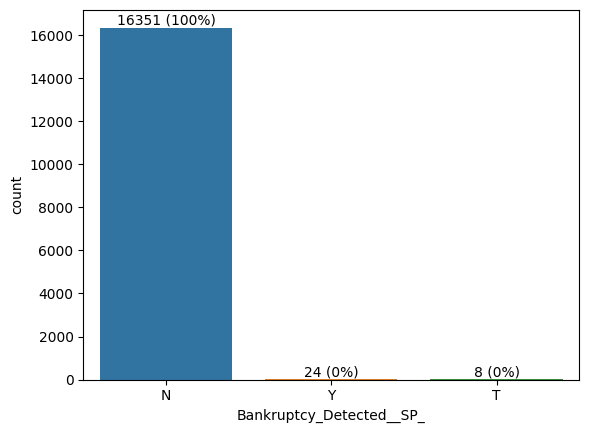

In [34]:
# Countplot for the column - Bankruptcy_Detected__SP_
ax = sns.countplot(x=df['Bankruptcy_Detected__SP_'],
order=df['Bankruptcy_Detected__SP_'].value_counts(ascending=False).index);

abs_values = df['Bankruptcy_Detected__SP_'].value_counts(ascending=False)
rel_values = df['Bankruptcy_Detected__SP_'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

[Text(0, 0, '16292 (99%)'), Text(0, 0, '83 (1%)'), Text(0, 0, '8 (0%)')]

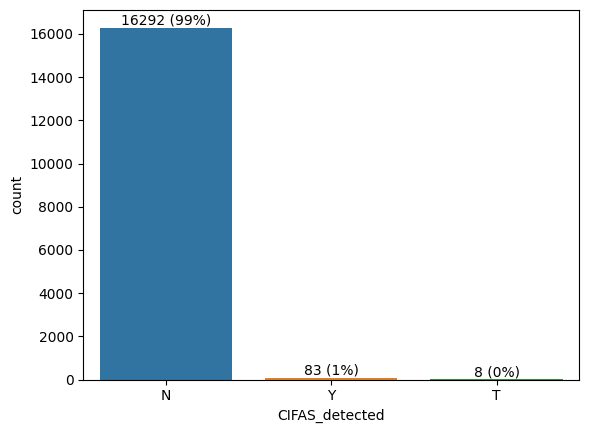

In [35]:
# Countplot for the column - CIFAS_detected
ax = sns.countplot(x=df['CIFAS_detected'],
order=df['CIFAS_detected'].value_counts(ascending=False).index);

abs_values = df['CIFAS_detected'].value_counts(ascending=False)
rel_values = df['CIFAS_detected'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

#####bi-variate

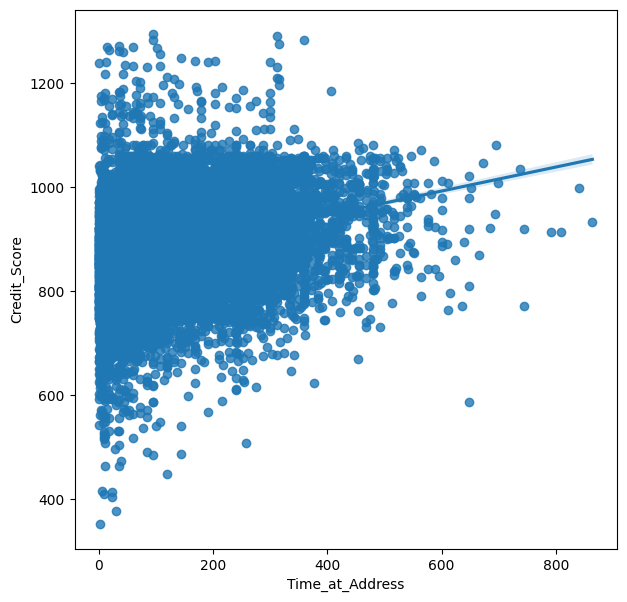

In [36]:
# Time at Address vs. Credit Score
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

# Plot the relationship between two variables
plt.figure(figsize=(7,7))
sns.regplot(x=df['Time_at_Address'], y=df['Credit_Score'])
plt.show()

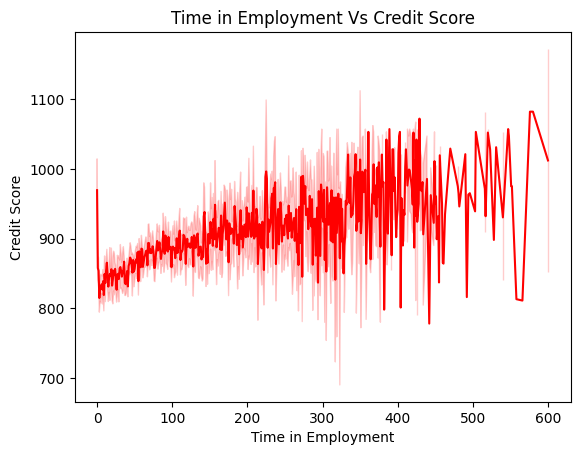

In [37]:
# Time in Employment vs. Credit Score

plt.title('Time in Employment Vs Credit Score')
plt.xlabel('Time in Employment')
plt.ylabel('Credit Score')
sns.lineplot(x='Time_in_Employment', y='Credit_Score', data=df, color='r')
plt.show()

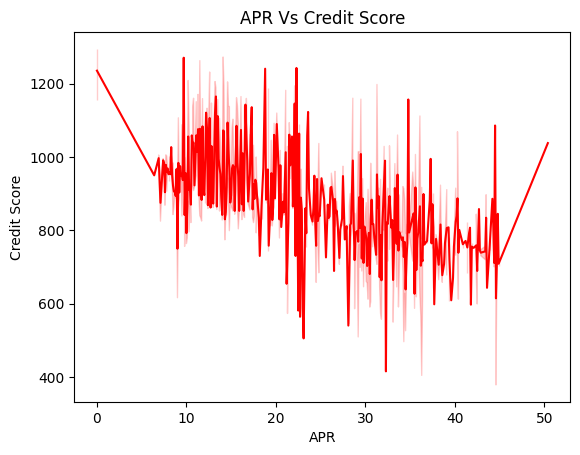

In [39]:
# APR vs. Credit Score

plt.title('APR Vs Credit Score')
plt.xlabel('APR')
plt.ylabel('Credit Score')
sns.lineplot(x='APR', y='Credit_Score', data=df, color='r')
plt.show()

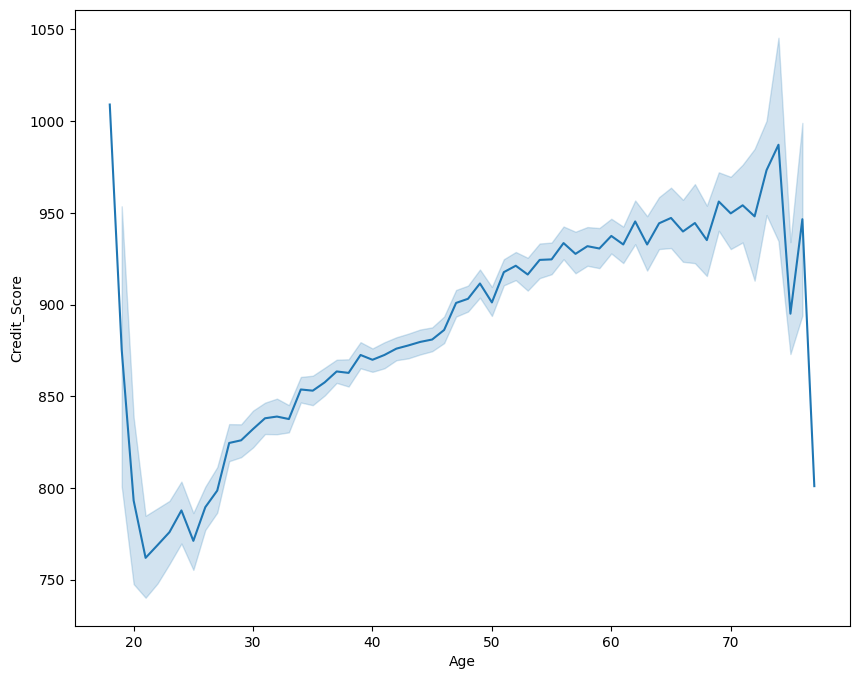

In [42]:
# Age vs. Credit Score
plt.figure(figsize=(10,8))
sns.lineplot(x=abs(df["Age"]),y=df["Credit_Score"])
plt.show()

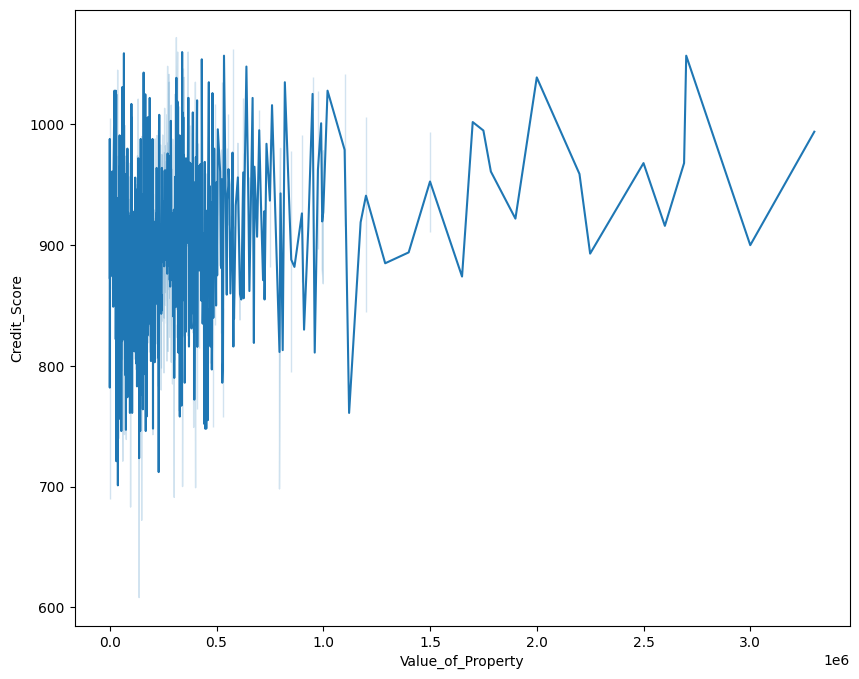

In [43]:
# Value_of_Property vs. Credit Score
plt.figure(figsize=(10,8))
sns.lineplot(x=abs(df["Value_of_Property"]),y=df["Credit_Score"])
plt.show()

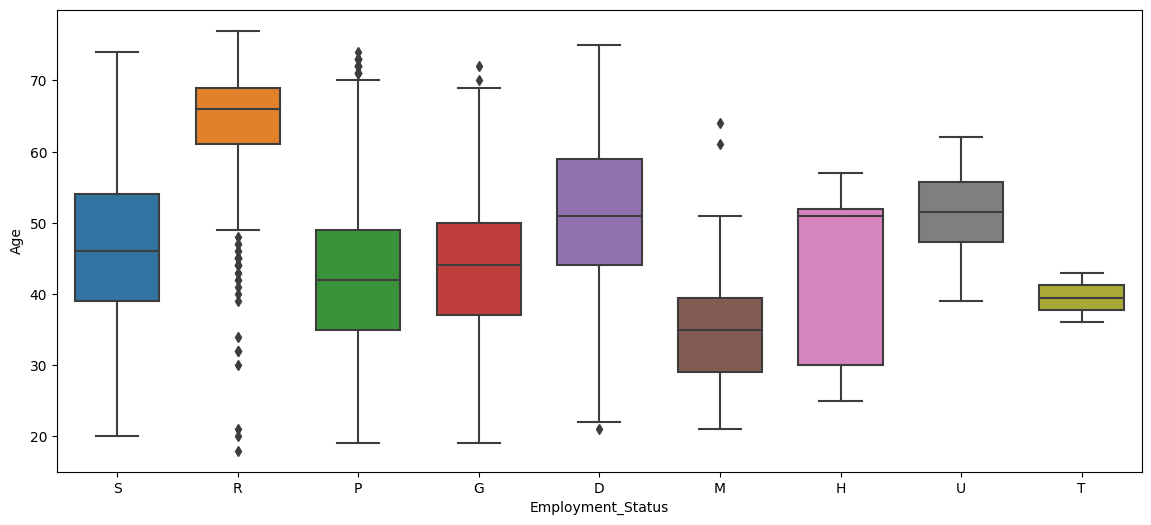

In [60]:
# Employment_Status vs. Age
plt.figure(figsize = (14,6))
sns.boxplot(x= df['Employment_Status'] , y= abs(df['Age']) ,width=.7)
plt.show()

#####multi-variate

<ipython-input-45-ba522e4c21f3>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


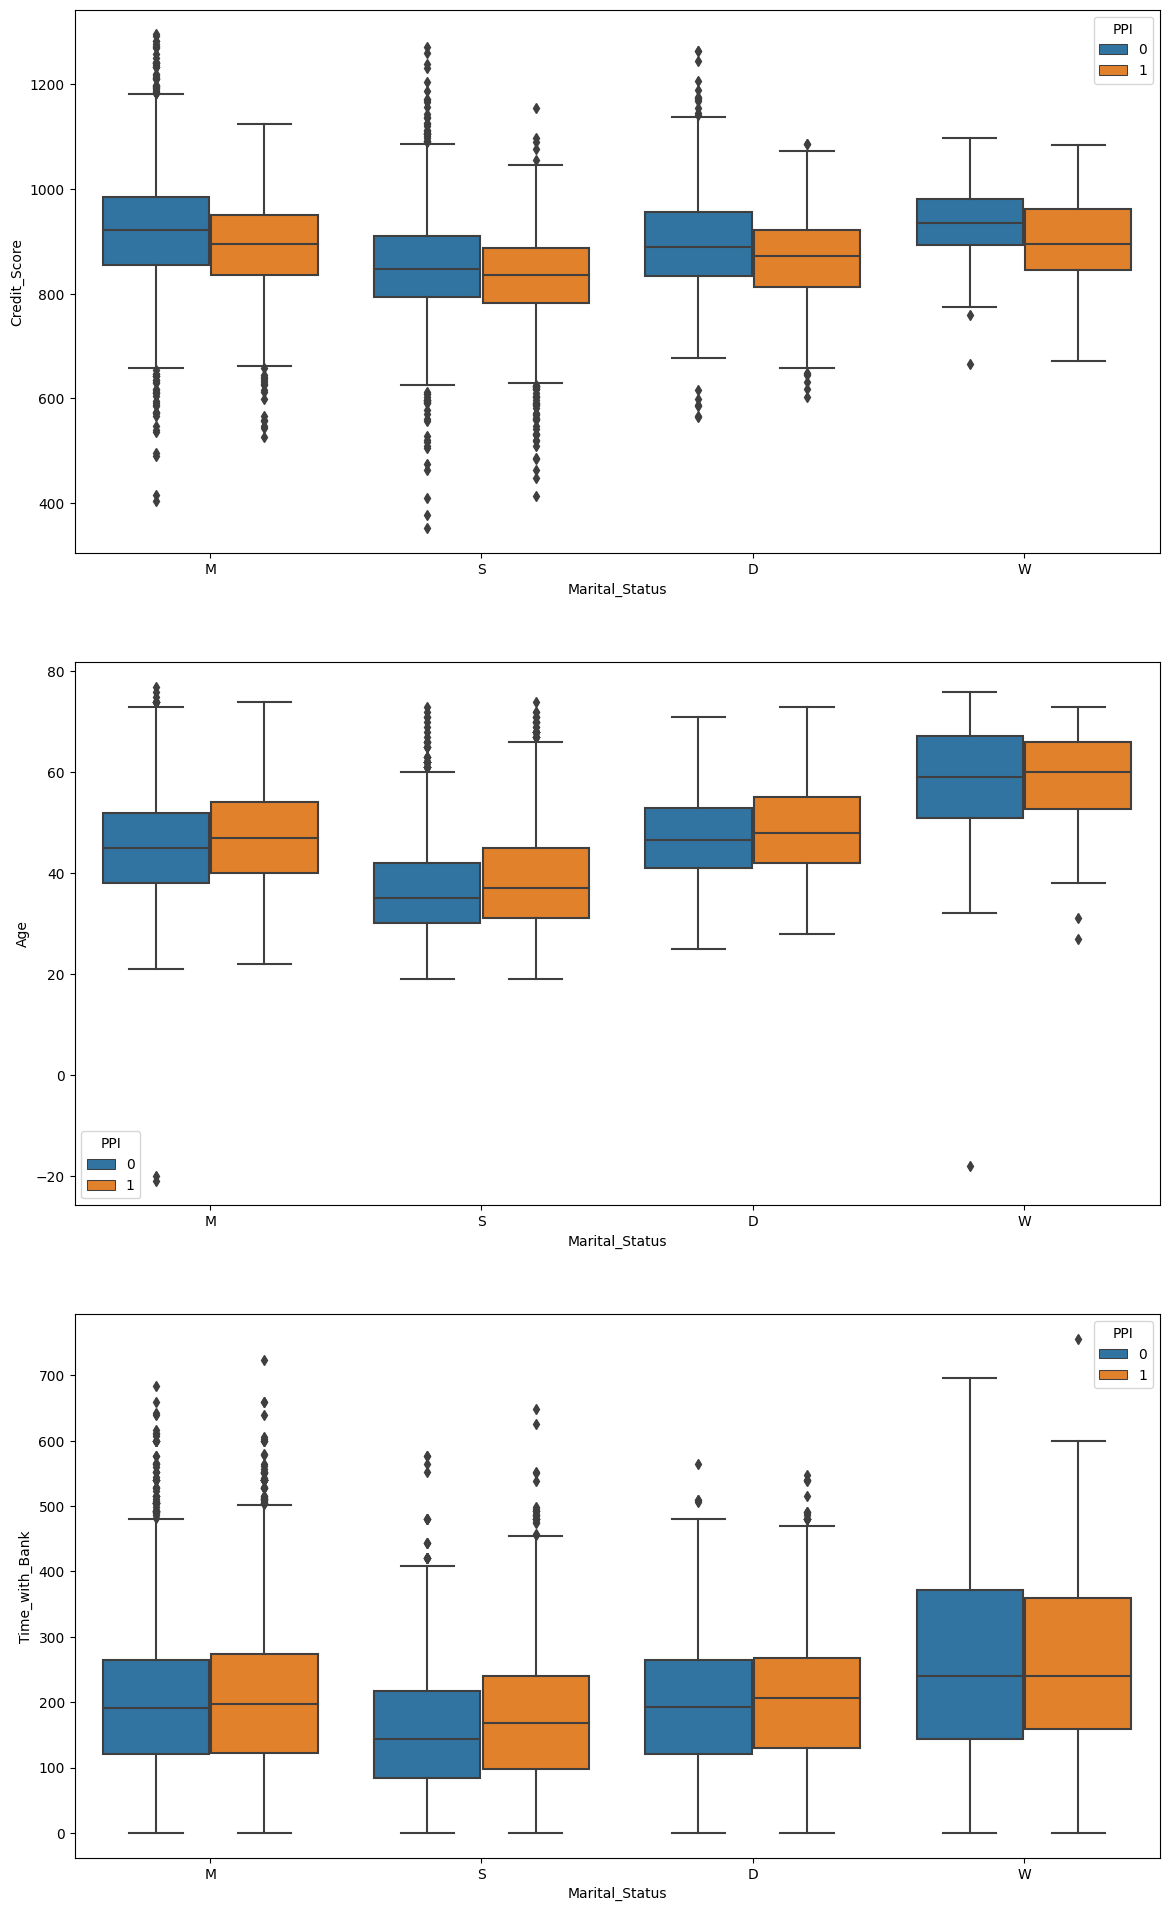

In [45]:
#Plotting subplots based on Marital Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Marital_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Marital_Status'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Marital_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

<ipython-input-46-3b18a48a9b91>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


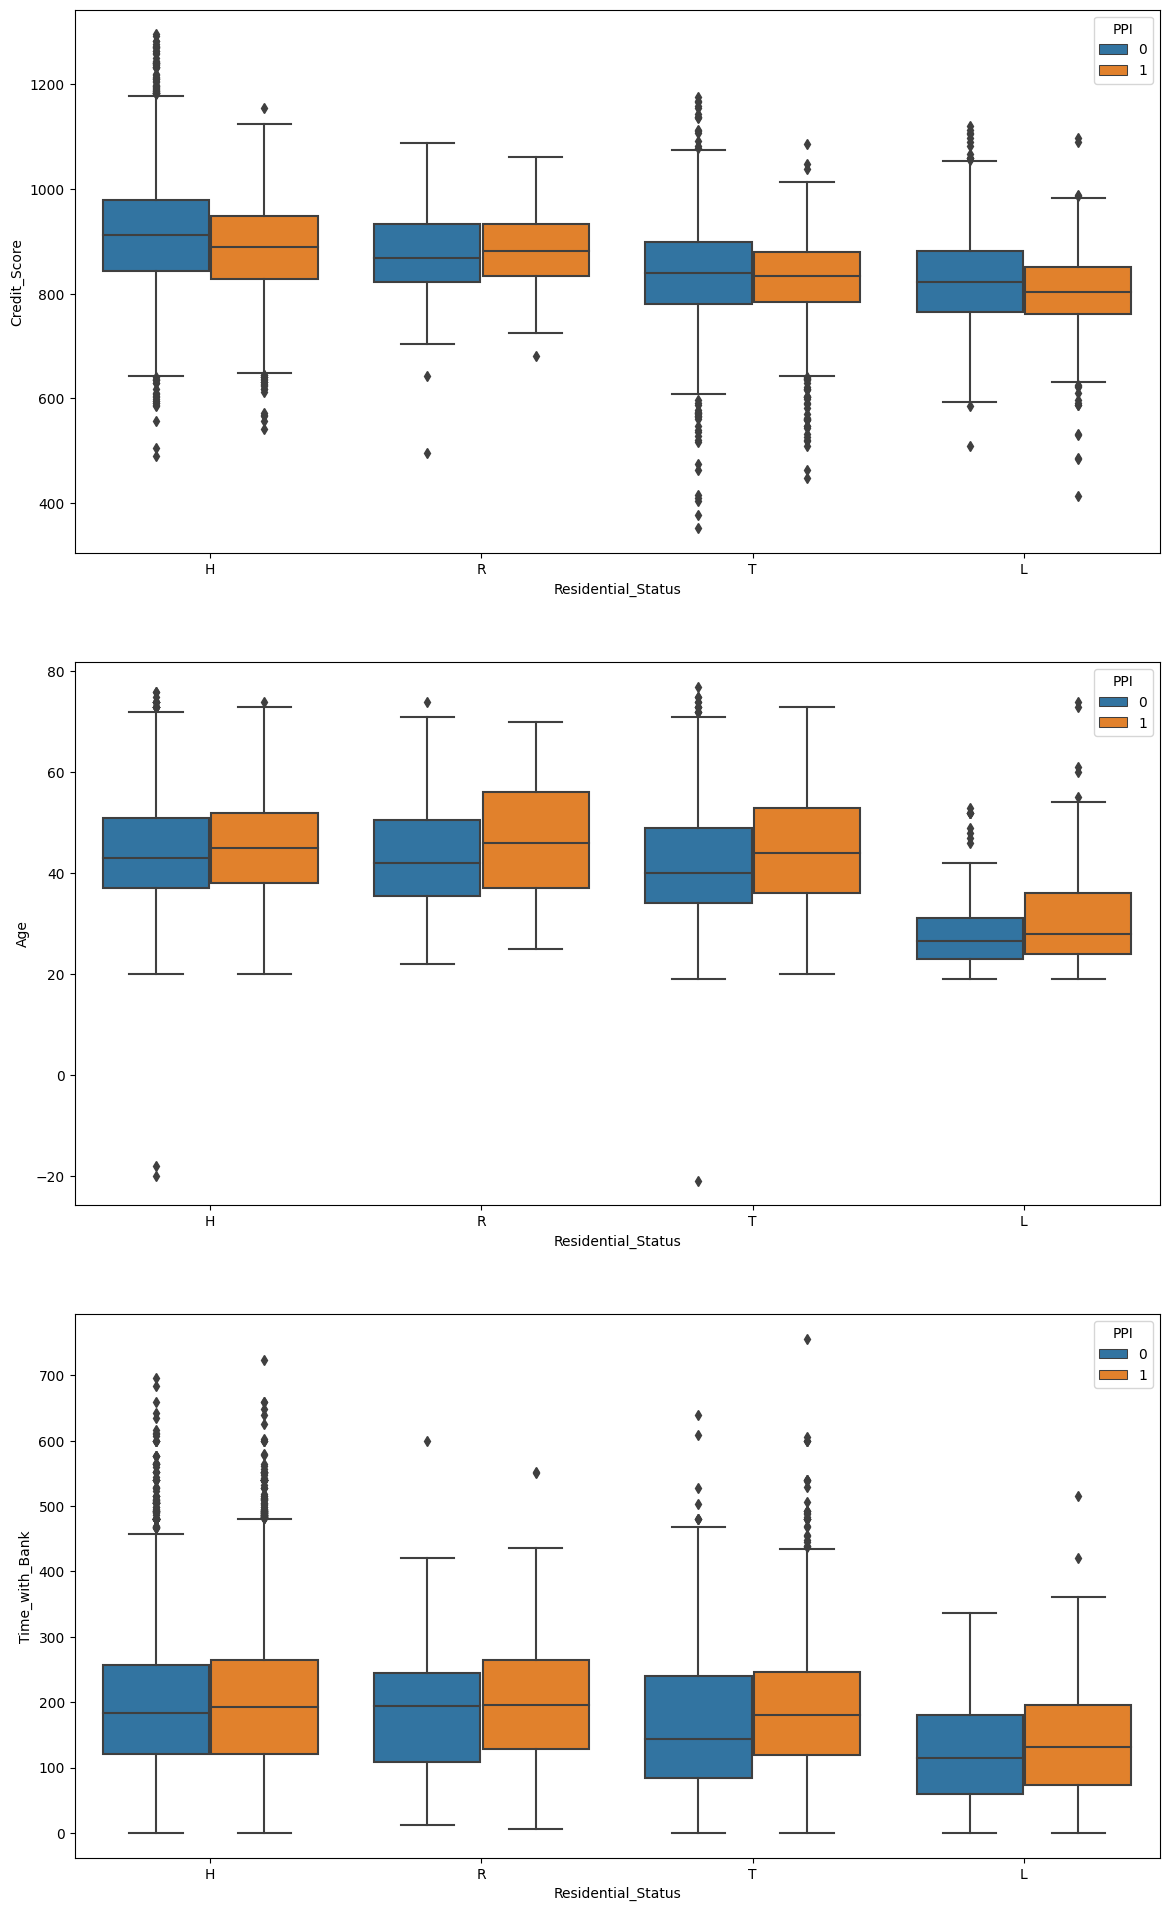

In [46]:
#Plotting subplots based on Residential_Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Residential_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Residential_Status'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Residential_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

<ipython-input-47-86b02decbe66>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


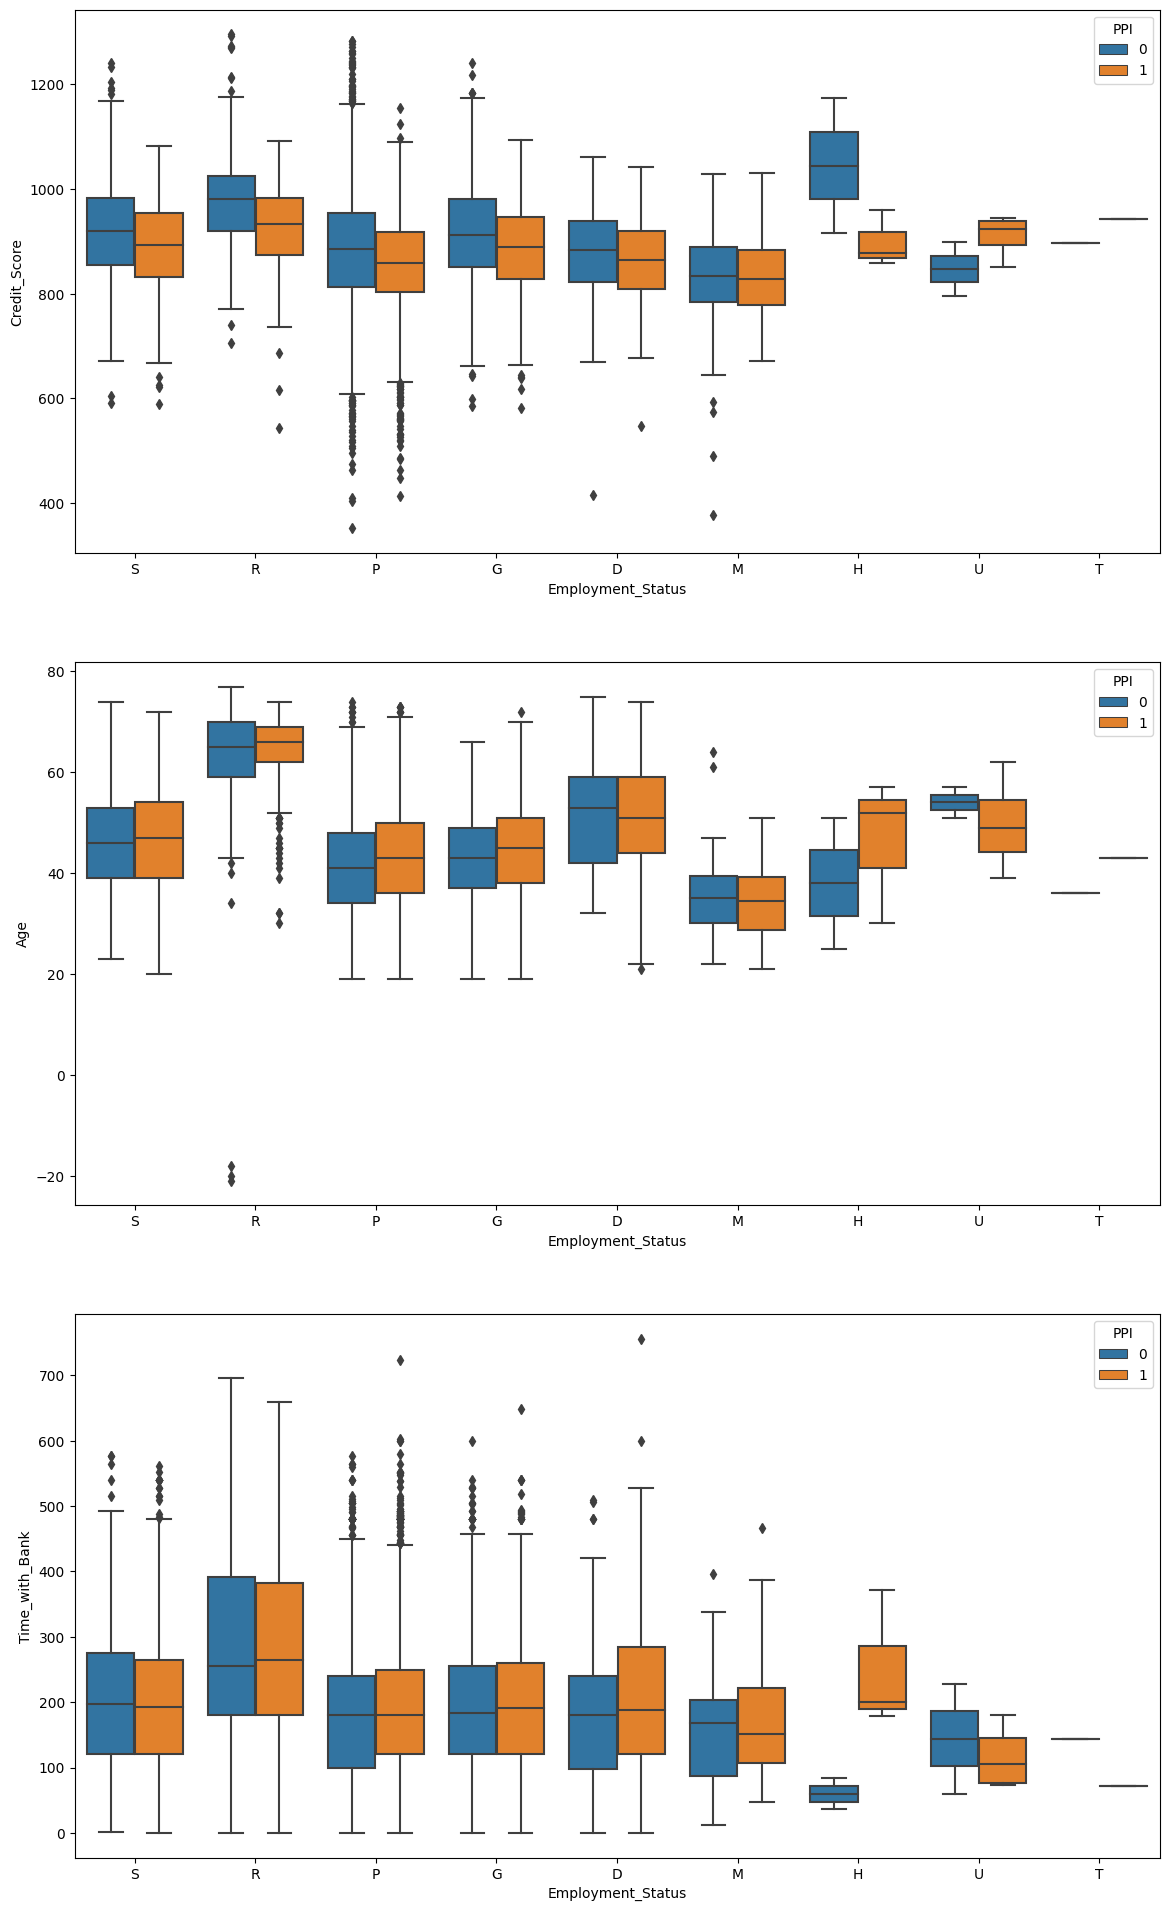

In [47]:
#Plotting subplots based on Employment_Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Employment_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Employment_Status'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Employment_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

<ipython-input-48-f5e971ec4e69>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


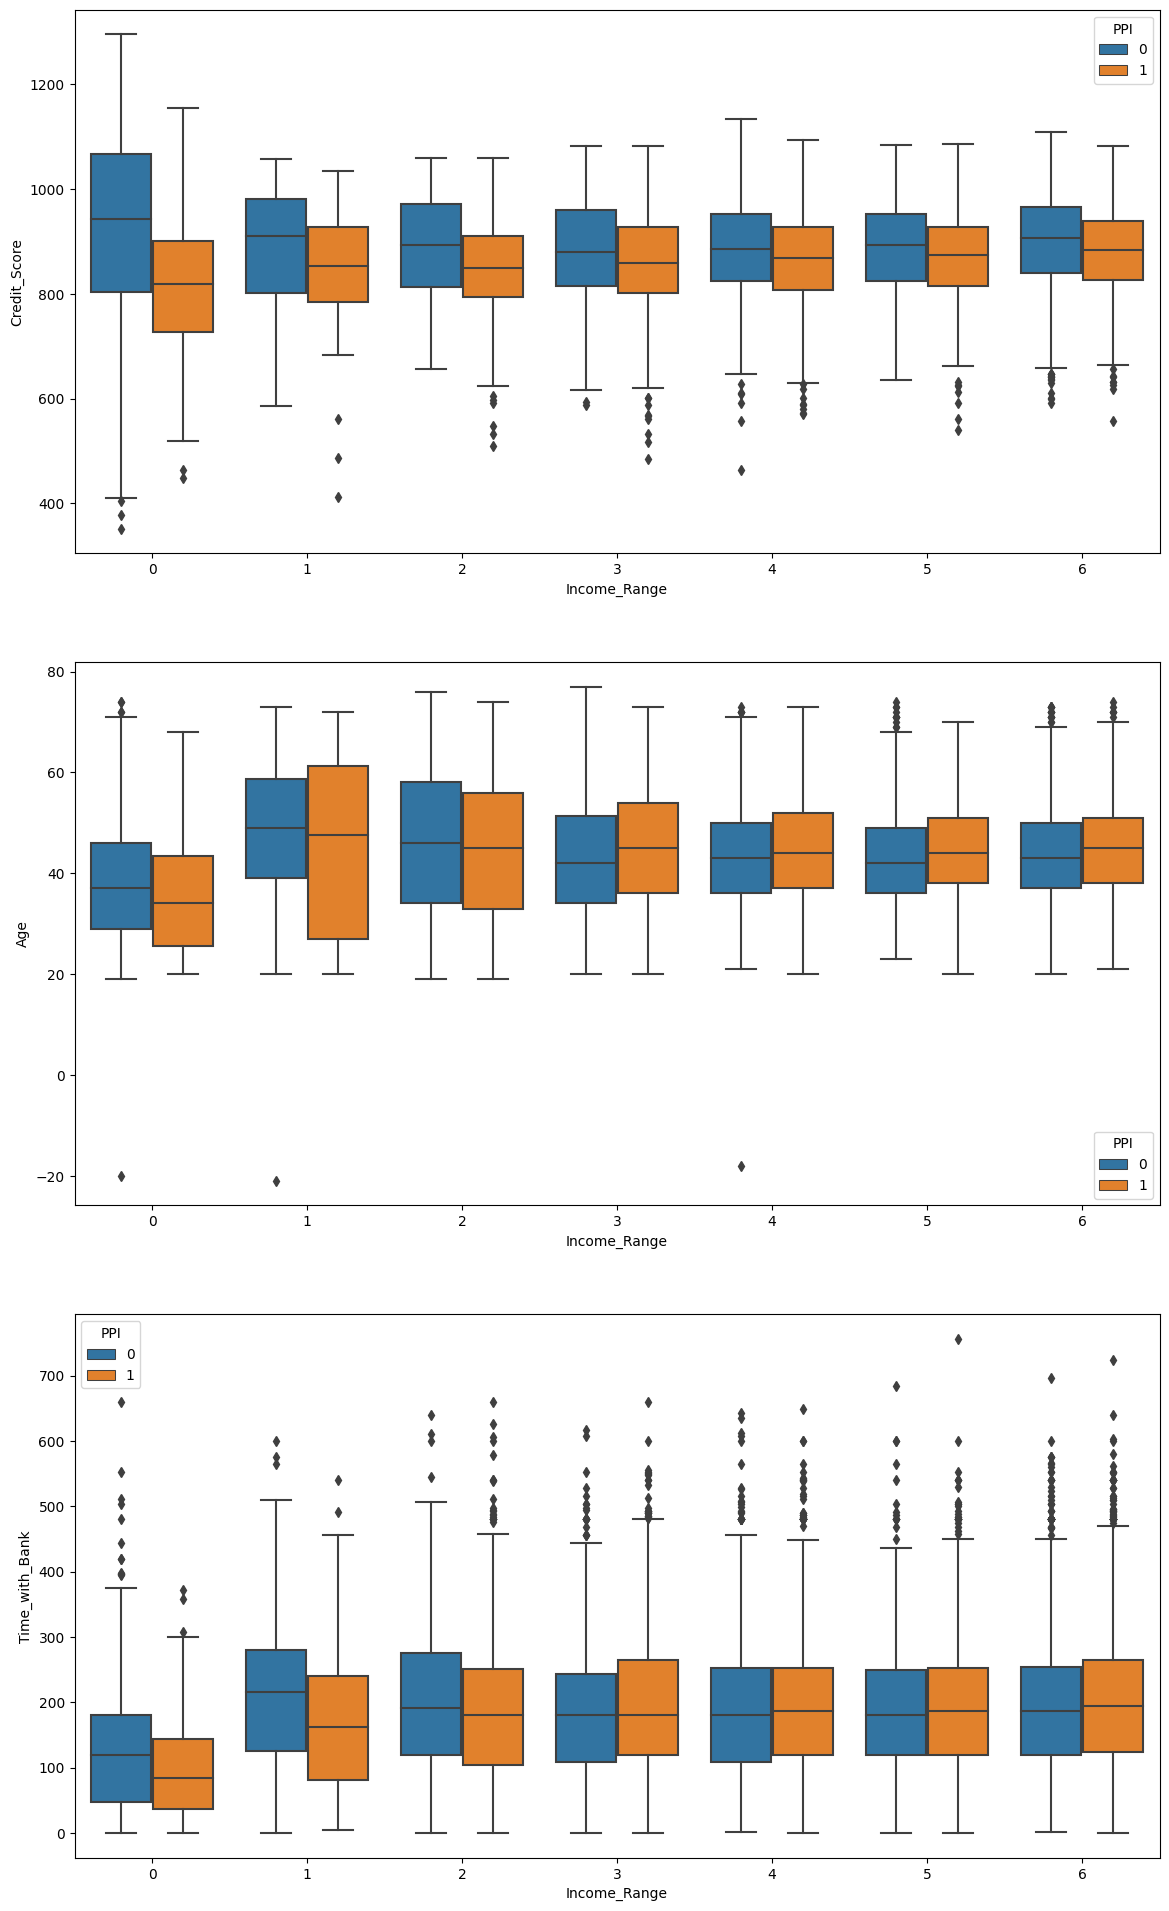

In [48]:
#Plotting subplots based on Income_Range
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Income_Range'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Income_Range'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Income_Range'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

#####Insights

1.
2.
3.
4.
5.

####Hypothesis Testing

#####Insights